# Ultimate Technologies Take Home Challenge

In [1]:
import pandas as pd
import json
from pandas.io.json import json_normalize
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import datetime as dt
import statsmodels.api as sm
from statsmodels.formula.api import ols
pd.set_option('max_columns', 100)
%matplotlib inline

C:\Users\maris\Anaconda3\envs\pymar\lib\site-packages\statsmodels\compat\pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools


## Part 1- Exploratory Data Analysis

The   attached  logins.json    file   contains   (simulated)   timestamps   of   user   logins   in   a   particular 
geographic   location.   Aggregate   these   login   counts   based   on   15­ minute   time   intervals,   and 
visualize   and   describe   the   resulting   time   series   of   login   counts   in   ways   that   best   characterize   the 
underlying   patterns   of   the   demand.   Please   report/illustrate   important   features   of   the   demand, 
such   as   daily   cycles.   If   there   are   data   quality   issues,   please   report   them.

In [2]:
df= pd.read_json('logins.json')
df.head()

,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
df.describe()

,login_time
count,93142
unique,92265
top,1970-02-12 11:16:53
freq,3
first,1970-01-01 20:12:16
last,1970-04-13 18:57:38


In [4]:
df.set_index('login_time', inplace = True)

In [5]:
df['count']=1
df=df.resample('15Min', how = sum)

C:\Users\maris\Anaconda3\envs\pymar\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: how in .resample() is deprecated
the new syntax is .resample(...)..apply(<func>)
  


In [6]:
df.head(20)

,count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1
1970-01-01 21:15:00,4
1970-01-01 21:30:00,0
1970-01-01 21:45:00,4
1970-01-01 22:00:00,9


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 9788 entries, 1970-01-01 20:00:00 to 1970-04-13 18:45:00
Freq: 15T
Data columns (total 1 columns):
count    9788 non-null int64
dtypes: int64(1)
memory usage: 152.9 KB


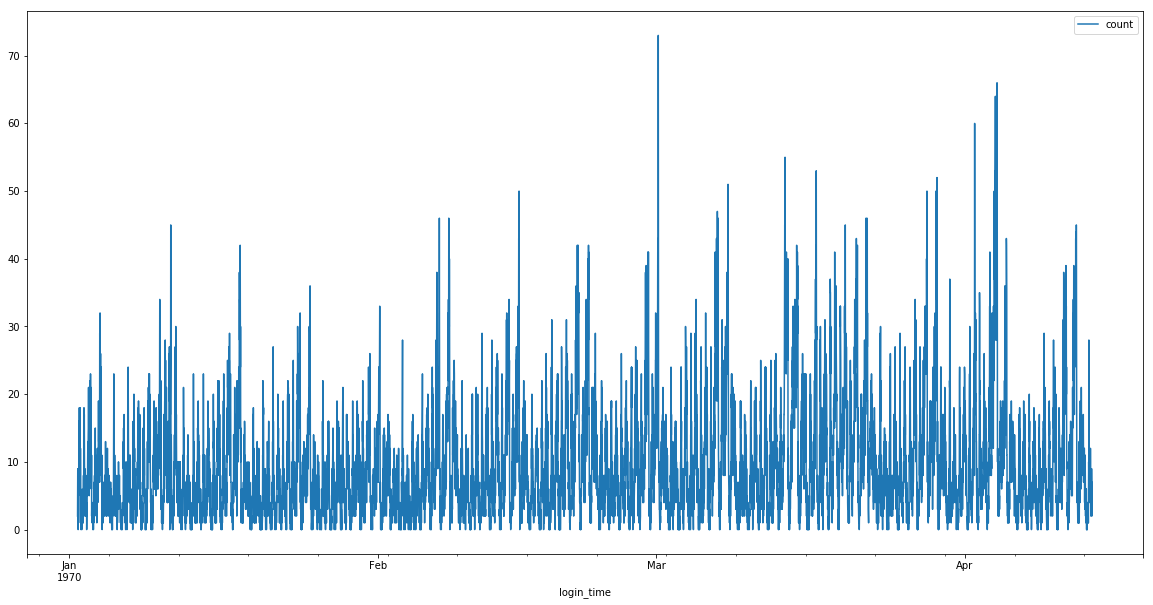

In [8]:
df.resample('15T').sum().plot(figsize=[20, 10])

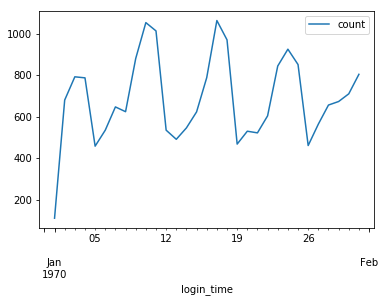

In [9]:
df.loc['1970-01-01':'1970-01-31'].resample('D').sum().plot()

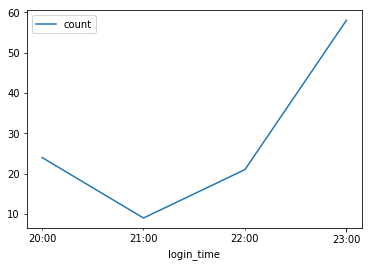

In [10]:
df.loc['1970-01-01':'1970-01-01'].resample('H').sum().plot()

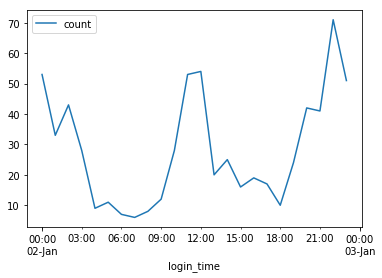

In [11]:
df.loc['1970-01-02':'1970-01-02'].resample('H').sum().plot()

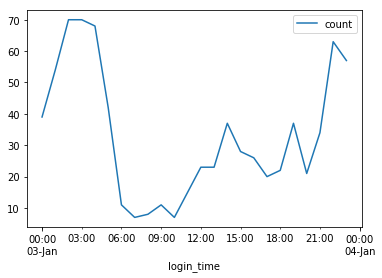

In [12]:
df.loc['1970-01-03':'1970-01-03'].resample('H').sum().plot()

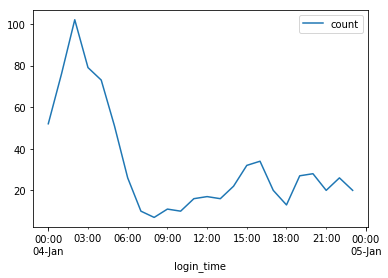

In [13]:
df.loc['1970-01-04':'1970-01-04'].resample('H').sum().plot()

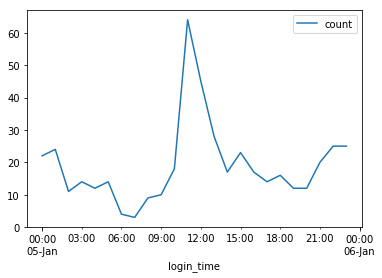

In [14]:
df.loc['1970-01-05':'1970-01-05'].resample('H').sum().plot()

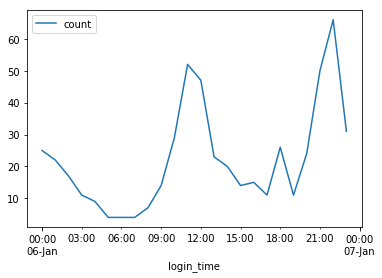

In [15]:
df.loc['1970-01-06':'1970-01-06'].resample('H').sum().plot()

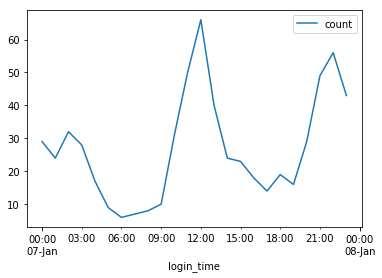

In [16]:
df.loc['1970-01-07':'1970-01-07'].resample('H').sum().plot()

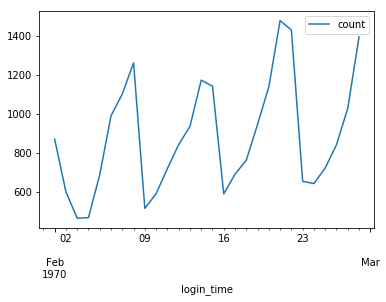

In [17]:
df.loc['1970-02-01':'1970-02-28'].resample('D').sum().plot()

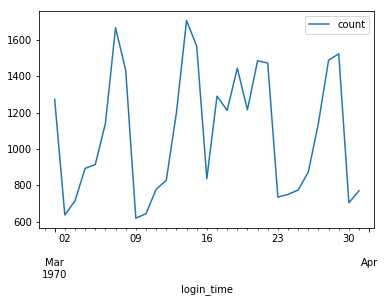

In [18]:
df.loc['1970-03-01':'1970-03-31'].resample('D').sum().plot()

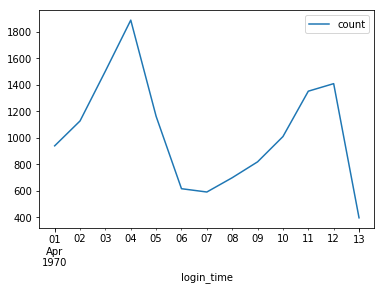

In [19]:
df.loc['1970-04-01':'1970-04-13'].resample('D').sum().plot()

The above lineplots illustrate that there is a weekly cycle in the logins where the logins peak approximately once per week. It also illustrates that there is a daily cycle of logins in which logins peak around noon and midnight.

In [20]:
df=df.reset_index()

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9788 entries, 0 to 9787
Data columns (total 2 columns):
login_time    9788 non-null datetime64[ns]
count         9788 non-null int64
dtypes: datetime64[ns](1), int64(1)
memory usage: 153.0 KB


In [22]:
#creating day of week column Monday=0, Sunday=6
df['weekday'] = df['login_time'].dt.dayofweek
df['hour']=df['login_time'].dt.hour

In [23]:
df.head()

,login_time,count,weekday,hour
0,1970-01-01 20:00:00,2,3,20
1,1970-01-01 20:15:00,6,3,20
2,1970-01-01 20:30:00,9,3,20
3,1970-01-01 20:45:00,7,3,20
4,1970-01-01 21:00:00,1,3,21


C:\Users\maris\Anaconda3\envs\pymar\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


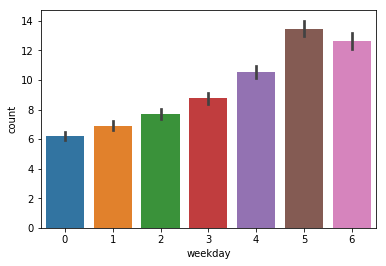

In [24]:
sns.barplot(x='weekday', y='count', data=df)

According to the above bar chart Monday has the least number of logins.  The number of logins then increases through Saturday where it peaks for the week and then decreases slightly on sunday.

C:\Users\maris\Anaconda3\envs\pymar\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


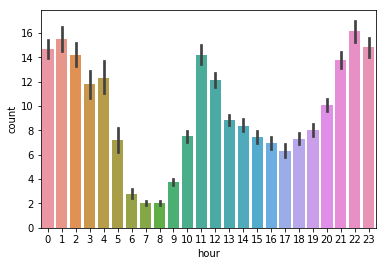

In [25]:
sns.barplot(x='hour', y='count', data=df)

The above barchart confirms what was illustrated in the line plots.  Across all days of the week logins peak around 11am and 10pm.  Low numbers of logins appear around 7-8 am and 5pm.  These times coincide with time many people leave home to go to work and leave work to go home which may explain low logins.

## Part 2- Experiment and Metrics Design

The   neighboring   cities   of   Gotham   and   Metropolis   have   complementary   circadian   rhythms:   on 
weekdays,   Ultimate   Gotham   is   most   active   at   night,   and   Ultimate   Metropolis   is   most   active 
during   the   day.   On   weekends,   there   is   reasonable   activity   in   both   cities. 

However,   a   toll   bridge,   with   a   two ­way   toll,   between   the   two   cities   causes   driver   partners   to tend to   be   exclusive   to   each   city.   The   Ultimate   managers   of   city   operations   for   the   two   cities   have 
proposed   an   experiment   to   encourage   driver   partners   to   be   available   in   both   cities,   by 
reimbursing   all   toll   costs. 

1. What   would   you   choose   as   the   key   measure   of   success   of   this   experiment   in 
encouraging   driver   partners   to   serve   both   cities,   and   why   would   you   choose   this   metric? 

2. Describe   a   practical   experiment   you   would   design   to   compare   the   effectiveness   of   the 
proposed   change   in   relation   to   the   key   measure   of   success.   Please   provide   details   on:  
a. how   you   will   implement   the   experiment 
b. what   statistical   test(s)   you   will   conduct   to   verify   the   significance   of   the 
observation 
c. how   you   would   interpret   the   results   and   provide   recommendations   to   the   city 
operations   team   along   with   any   caveats. 

Answers:
1.  Key metrics would be the proportion of rides starting in each city over the total rides starting in both cities.  This would lead to two metrics- 1. proportion of rides in Gotham and 2. proportion of rides in Metropolis.  I would choose this as a metric as the proposal to reimburse toll costs is to maximize drivers being available in both cities and we want to measure how this project will impact the amout of rides the drivers have in both cities.

2. For this experient I would first collect the porpotion of total rides in Gotham and Metropolis currently (before the roll reimbursment) for several weeks to establish a baseline of current rates.  Next I would  begin the toll reimbursement.  Over the next several weeks I would collect the same data on proportion of total rides in each city.  Ideally the number of weeks of collected before and after the toll reimbursement started would be the same.  To examine the impact of the toll reimburement I would then conduct an ANOVA test of the each proportion of rides in each city across all riders. The results of the ANOVA test would help to determine if proportion of rides in each city were statistically different before and after the toll reimbursement.  Results would be able to help determine if the toll reimbursement project helped to increase the amount of rides in both, just one, or neither city.  These results would then help the city opertations team determine if the project was successful.  

## Part 3- Predictive Modeling

Ultimate   is   interested   in   predicting   rider   retention.   To   help   explore   this   question,   we   have 
provided   a   sample   dataset   of   a   cohort   of   users   who   signed   up   for   an   Ultimate   account   in January   2014.   The   data   was   pulled   several   months   later;   we   consider   a   user   retained   if   they 
were   “active”   (i.e.   took   a   trip)   in   the   preceding   30   days. 

 

We   would   like   you   to   use   this   data   set   to   help   understand   what   factors   are   the   best   predictors 
for   retention,   and   offer   suggestions   to   operationalize   those   insights   to   help   Ultimate. 

 

1. Perform   any   cleaning,   exploratory   analysis,   and/or   visualizations   to   use   the   provided 
data   for   this   analysis   (a   few   sentences/plots   describing   your   approach   will   suffice).   What 
fraction   of   the   observed   users   were   retained? 
2. Build   a   predictive   model   to   help   Ultimate   determine   whether   or   not   a   user   will   be   active 
in   their   6th   month   on   the   system.   Discuss   why   you   chose   your   approach,   what 
alternatives   you   considered,   and   any   concerns   you   have.   How   valid   is   your   model? 
Include   any   key   indicators   of   model   performance. 
3. Briefly   discuss   how   Ultimate   might   leverage   the   insights   gained   from   the   model   to 
improve   its   long­ term   rider   retention   (again,   a   few   sentences   will   suffice). 

## 1-Data Cleaning and Exploratory analysis

In [26]:
file = 'ultimate_data_challenge.json'


In [27]:
data = json.loads(open(file).read())
data[0]

{'avg_dist': 3.67,
 'avg_rating_by_driver': 5.0,
 'avg_rating_of_driver': 4.7,
 'avg_surge': 1.1,
 'city': "King's Landing",
 'last_trip_date': '2014-06-17',
 'phone': 'iPhone',
 'signup_date': '2014-01-25',
 'surge_pct': 15.4,
 'trips_in_first_30_days': 4,
 'ultimate_black_user': True,
 'weekday_pct': 46.2}

In [28]:
data = json_normalize(data)

In [29]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4


In [30]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null object
phone                     49604 non-null object
signup_date               50000 non-null object
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


In [31]:
print("Missing values for average rating by driver: "+str(50000-49799))
print("Missing values for average rating ofdriver: "+str(50000-41878))
print("Missing values for phone number: "+str(50000-49604))

Missing values for average rating by driver: 201
Missing values for average rating ofdriver: 8122
Missing values for phone number: 396


In [32]:
data['signup_date']=pd.to_datetime(data['signup_date'])
data['last_trip_date']=pd.to_datetime(data['last_trip_date'])

In [33]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
avg_dist                  50000 non-null float64
avg_rating_by_driver      49799 non-null float64
avg_rating_of_driver      41878 non-null float64
avg_surge                 50000 non-null float64
city                      50000 non-null object
last_trip_date            50000 non-null datetime64[ns]
phone                     49604 non-null object
signup_date               50000 non-null datetime64[ns]
surge_pct                 50000 non-null float64
trips_in_first_30_days    50000 non-null int64
ultimate_black_user       50000 non-null bool
weekday_pct               50000 non-null float64
dtypes: bool(1), datetime64[ns](2), float64(6), int64(1), object(2)
memory usage: 4.2+ MB


In [34]:
data['difference_days']=data['last_trip_date']-data['signup_date']
data['difference_days']=data['difference_days'].astype(dt.timedelta).map(lambda x: np.nan if pd.isnull(x) else x.days)

In [35]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,difference_days
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47


In [36]:
data.sort_values('last_trip_date')[-1:]['last_trip_date']

45357   2014-07-01
Name: last_trip_date, dtype: datetime64[ns]

Last trip date in dataset was 7/1/14.  Active users will be defined as users who rode between 6/1/14 and 7/1/14.

In [37]:
import datetime
d1 = datetime.datetime(2014, 6, 1)
d2 = datetime.datetime(2014, 7, 1)
data['active']=data['last_trip_date'].apply(lambda a: "yes" if d1 < a <= d2 else "no")

In [38]:
data.head(30)

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,difference_days,active
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143,yes
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96,no
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,no
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170,yes
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47,no
5,10.56,5.0,3.5,1.00,Winterfell,2014-06-06,iPhone,2014-01-09,0.0,2,True,100.0,148,yes
6,3.95,4.0,NaN,1.00,Astapor,2014-01-25,Android,2014-01-24,0.0,1,False,100.0,1,no
7,2.04,5.0,5.0,1.00,Winterfell,2014-01-29,iPhone,2014-01-28,0.0,2,False,100.0,1,no
8,4.36,5.0,4.5,1.00,Winterfell,2014-02-01,Android,2014-01-21,0.0,2,False,100.0,11,no
9,2.37,5.0,NaN,1.00,Winterfell,2014-01-05,Android,2014-01-03,0.0,1,False,0.0,2,no


In [39]:
data.describe()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct,difference_days
count,50000.000000,49799.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,50000.000000
mean,5.796827,4.778158,4.601559,1.074764,8.849536,2.278200,60.926084,92.790100
std,5.707357,0.446652,0.617338,0.222336,19.958811,3.792684,37.081503,62.129822
min,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.420000,4.700000,4.300000,1.000000,0.000000,0.000000,33.300000,27.000000
50%,3.880000,5.000000,4.900000,1.000000,0.000000,1.000000,66.700000,110.000000
75%,6.940000,5.000000,5.000000,1.050000,8.600000,3.000000,100.000000,150.000000
max,160.960000,5.000000,5.000000,8.000000,100.000000,125.000000,100.000000,181.000000


In [40]:
data.groupby(data['active']).describe()

avg_dist                                                     \
          count      mean       std  min   25%   50%   75%     max   
active                                                               
no      31690.0  6.188478  6.213027  0.0  2.32  4.03  7.77  129.89   
yes     18310.0  5.118977  4.627946  0.0  2.56  3.73  5.88  160.96   

       avg_rating_by_driver                                               \
                      count      mean       std  min  25%  50%  75%  max   
active                                                                     
no                  31523.0  4.786876  0.503869  1.0  4.8  5.0  5.0  5.0   
yes                 18276.0  4.763121  0.324566  1.0  4.7  4.8  5.0  5.0   

       avg_rating_of_driver                                               \
                      count      mean       std  min  25%  50%  75%  max   
active                                                                     
no                  25136.0  4.607018  0.664816  1.0  4.4  5.0  5.0  5.0   
yes                 16742.0  4.593364  0.538166  1.0  4.3  4.8  5.0  5.0   

       avg_surge                                                \
           count      mean       std  min  25%  50%   75%  max   
active                                                           
no       31690.0  1.075367  0.250219  1.0  1.0  1.0  1.00  8.0   
yes      18310.0  1.073720  0.163183  1.0  1.0  1.0  1.09  4.5   

       difference_days                                                     \
                 count        mean        std    min    25%    50%    75%   
active                                                                      
no             31690.0   56.486115  49.042532    0.0    3.0   52.0  104.0   
yes            18310.0  155.623157  12.210781  122.0  147.0  156.0  165.0   

              surge_pct                                                   \
          max     count      mean        std  min  25%  50%   75%    max   
active                                                                     
no      151.0   31690.0  8.688548  22.132211  0.0  0.0  0.0   0.0  100.0   
yes     181.0   18310.0  9.128165  15.489344  0.0  0.0  0.0  13.3  100.0   

       trips_in_first_30_days                                                 \
                        count      mean       std  min  25%  50%  75%    max   
active                                                                         
no                    31690.0  1.659167  2.661903  0.0  0.0  1.0  2.0   73.0   
yes                   18310.0  3.349590  5.020615  0.0  0.0  2.0  4.0  125.0   

       weekday_pct                                                       
             count       mean        std  min   25%   50%    75%    max  
active                                                                   
no         31690.0  60.181597  40.985698  0.0  16.7  66.7  100.0  100.0  
yes        18310.0  62.214604  29.068319  0.0  45.5  65.2   85.7  100.0

From the above descriptive statistics we can say that the average distance for all trips in the first 30 days of sign up is approximately 6 miles.  The average rating by driver is 4.78 with the majority of values above 4.7.  The average rating of driver was 4.6 with the majority of values above 4.3. The average surge multiplier was 1.07.  The average percent of trips taken with a surge mulitplier over 1 was 8.85.  Across all users the average number of trips in the first 30 days was approximately 2.  On average approximately 60 percent of trips were taking on the weekday.  The majority of these averages did not appear to differ if the user was active or not.  The one metric that did appear to differ between active users and those who are not was the number of trips in the first 30 days. To examine if this was a statistically different amount I decided to conduct an ANOVA using OLS.

In [41]:
results = ols('trips_in_first_30_days ~ C(active)',data=data).fit()
results.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                              
==================================================================================
Dep. Variable:     trips_in_first_30_days   R-squared:                       0.046
Model:                                OLS   Adj. R-squared:                  0.046
Method:                     Least Squares   F-statistic:                     2417.
Date:                    Sat, 13 Oct 2018   Prob (F-statistic):               0.00
Time:                            17:34:04   Log-Likelihood:            -1.3642e+05
No. Observations:                   50000   AIC:                         2.728e+05
Df Residuals:                       49998   BIC:                         2.729e+05
Df Model:                               1                                         
Covariance Type:                nonrobust                                         
====================================================================================
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            1.6592      0.021     79.735      0.000       1.618       1.700
C(active)[T.yes]     1.6904      0.034     49.160      0.000       1.623       1.758
==============================================================================
Omnibus:                    52991.851   Durbin-Watson:                   2.007
Prob(Omnibus):                  0.000   Jarque-Bera (JB):          7396363.058
Skew:                           5.121   Prob(JB):                         0.00
Kurtosis:                      61.697   Cond. No.                         2.42
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

The above ANOVA results show that there is a significant difference in the number of trips in the first 30 days between those that are still active and those that are not. 

C:\Users\maris\Anaconda3\envs\pymar\lib\site-packages\scipy\stats\stats.py:1706: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval


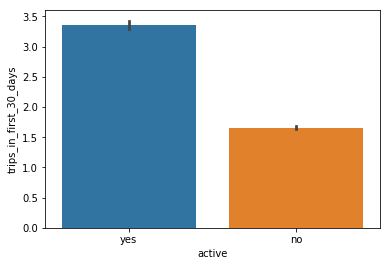

In [42]:
sns.barplot(x='active', y='trips_in_first_30_days', data=data)

The above bar graph illustrates the different in the number od trips in the first 30 days between active users and inactive users.

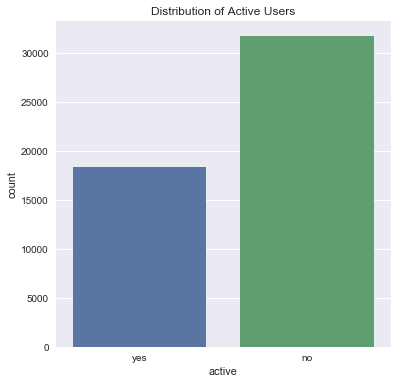

In [43]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Active Users')
sns.countplot(x = 'active', data = data)

The above bar graph illustrates that their are more inactive users than active ones.

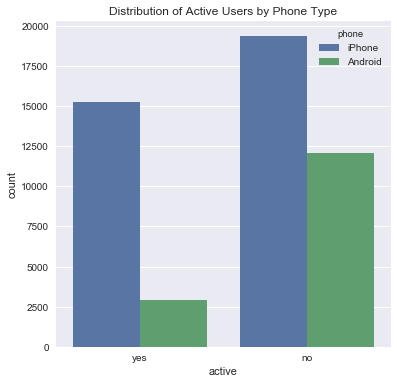

In [44]:
sns.set(rc={'figure.figsize':(6,6)})
plt.title('Distribution of Active Users by Phone Type')
sns.countplot(x = 'active', hue='phone', data = data)

The above barg graph shows the type of phone active and inactive users use.  The graph illustrates that the majority of both inactive and active users use iPhones but the gap between the phone type is larger between the active users.

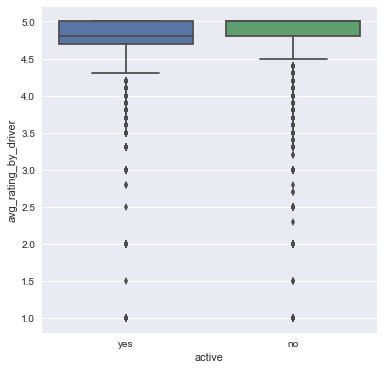

In [45]:
sns.boxplot(x="active", y="avg_rating_by_driver", data=data)

The above boxplot illustrates that the majority of ratings by user were anove 4.25 for the active users and anove 4.5 for the inactive users.

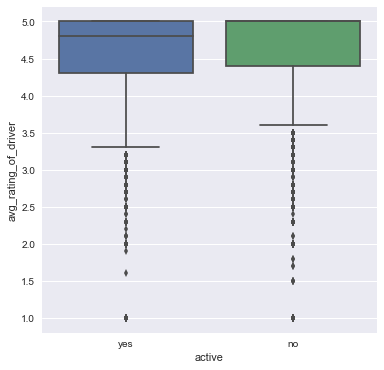

In [46]:
sns.boxplot(x="active", y="avg_rating_of_driver", data=data)

the above boxplot shows that the majority of ratings of the driver were above 3.25 for the active users and above 3.5 for the inactive users.

In [47]:
corr=data.corr()
corr

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,difference_days
avg_dist,1.000000,0.080540,0.034509,-0.081491,-0.104414,-0.136329,0.032310,0.101652,-0.109431
avg_rating_by_driver,0.080540,1.000000,0.123175,0.010597,0.020103,-0.039115,0.009343,0.020442,-0.032733
avg_rating_of_driver,0.034509,0.123175,1.000000,-0.026189,-0.003899,-0.011302,-0.002086,0.014630,-0.016820
avg_surge,-0.081491,0.010597,-0.026189,1.000000,0.793582,-0.001841,-0.078791,-0.110071,-0.016809
surge_pct,-0.104414,0.020103,-0.003899,0.793582,1.000000,0.005720,-0.106861,-0.144918,0.004068
trips_in_first_30_days,-0.136329,-0.039115,-0.011302,-0.001841,0.005720,1.000000,0.112210,0.050388,0.164784
ultimate_black_user,0.032310,0.009343,-0.002086,-0.078791,-0.106861,0.112210,1.000000,0.035998,0.165035
weekday_pct,0.101652,0.020442,0.014630,-0.110071,-0.144918,0.050388,0.035998,1.000000,0.020408
difference_days,-0.109431,-0.032733,-0.016820,-0.016809,0.004068,0.164784,0.165035,0.020408,1.000000


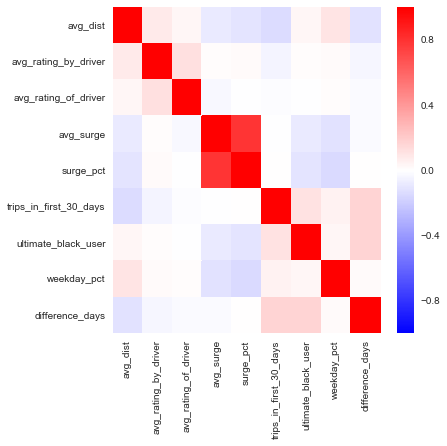

In [48]:
sns.heatmap(corr, 
        xticklabels=corr.columns,
        yticklabels=corr.columns,
        vmin=-1,
        vmax=1,
        center=0,
        cmap = matplotlib.cm.get_cmap('bwr'))

The above correlation matrix and heatmap show that there were weak correlations among most of the variables in the dataset.  The largest correlation between two variables was between average surge and the percent of trips taken with a surge multiplier over 1 which was .79.  It is likely these are highly correlated as the percent of trips taken with a surge over 1 is dependent on the average surge multiplier.

In [49]:
data['active'].value_counts()

no     31690
yes    18310
Name: active, dtype: int64

In [50]:
str(round((data.active[data['active']=='yes'].count())/(data.active.count())*100)) +" percent of observed users were retained"

'37.0 percent of observed users were retained'

18,310 users in the dataset were considered active which was approximately 37 percent of the users.

## 2- Predictive Model

In [51]:
data['6_months']=data['difference_days'].apply(lambda a: "yes" if 180 < a  else "no")

In [52]:
data['1_month']=data['difference_days'].apply(lambda a: "yes" if 30 < a  else "no")

In [53]:
data['6_months'].value_counts()

no     49987
yes       13
Name: 6_months, dtype: int64

Only 13 users had usage at 6 months

In [54]:
data['1_month'].value_counts()

yes    36973
no     13027
Name: 1_month, dtype: int64

36973 users had usage at 1 month which is approximately 74% of users

In [55]:
data=data.dropna(subset = ['avg_rating_by_driver'])
data=data.dropna(subset = ['avg_rating_of_driver'])
data=data.dropna(subset = ['phone'])

In [56]:
features=list(data.columns)
features.remove('active')
features.remove('6_months')
features.remove('1_month')
features.remove('last_trip_date')
features.remove('signup_date')
features.remove('difference_days')
X=data[features]
X=pd.get_dummies(X)
y=data.active

In [57]:
#splitting data into test and training sets
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=30)

### Logistic Regression

In [58]:
#modeling using Logistic regression
from sklearn.linear_model import LogisticRegression
logr = LogisticRegression(random_state=5)
logr.fit(X_train, y_train)
logr.score(X_train, y_train) #accuracy

0.7108682913377684

In [59]:
logr.score(X_test, y_test)

0.7115168087502011

In [60]:
from sklearn import metrics
predicted = logr.predict(X_test)
class_labels=logr.classes_
matrix = metrics.confusion_matrix(y_test, predicted)
matrix_df=pd.DataFrame(matrix,index=class_labels, columns=class_labels)
matrix_df

,no,yes
no,6120,1330
yes,2257,2727


In [61]:
from sklearn.metrics import classification_report
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

         no       0.73      0.82      0.77      7450
        yes       0.67      0.55      0.60      4984

avg / total       0.71      0.71      0.71     12434



In [62]:
###  HOW TO GET with their feature name?

logr.coef_

array([[-3.79021582e-02, -1.98277711e-01, -5.30703948e-02,
        -1.43581277e-01,  3.37459454e-03,  1.06303561e-01,
         9.49559550e-01,  7.90951935e-04, -7.14137094e-01,
         1.01849422e+00, -1.63621124e-01, -4.96913563e-01,
         6.37649563e-01]])

In [63]:
X_train.columns

Index(['avg_dist', 'avg_rating_by_driver', 'avg_rating_of_driver', 'avg_surge',
       'surge_pct', 'trips_in_first_30_days', 'ultimate_black_user',
       'weekday_pct', 'city_Astapor', 'city_King's Landing', 'city_Winterfell',
       'phone_Android', 'phone_iPhone'],
      dtype='object')

In [64]:
feature_importances=pd.DataFrame(logr.coef_, 
                                index=X_train.columns,
                                columns=["importance"]).sort_values('importance', ascending=False)

ValueError: Shape of passed values is (13, 1), indices imply (1, 13)

### Gradient Boosting

In [65]:
data.head()

,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,city,last_trip_date,phone,signup_date,surge_pct,trips_in_first_30_days,ultimate_black_user,weekday_pct,difference_days,active,6_months,1_month
0,3.67,5.0,4.7,1.10,King's Landing,2014-06-17,iPhone,2014-01-25,15.4,4,True,46.2,143,yes,no,yes
1,8.26,5.0,5.0,1.00,Astapor,2014-05-05,Android,2014-01-29,0.0,0,False,50.0,96,no,no,yes
2,0.77,5.0,4.3,1.00,Astapor,2014-01-07,iPhone,2014-01-06,0.0,3,False,100.0,1,no,no,no
3,2.36,4.9,4.6,1.14,King's Landing,2014-06-29,iPhone,2014-01-10,20.0,9,True,80.0,170,yes,no,yes
4,3.13,4.9,4.4,1.19,Winterfell,2014-03-15,Android,2014-01-27,11.8,14,False,82.4,47,no,no,yes


In [66]:
data2=data[features]

In [67]:
cats=['city', 'phone', 'ultimate_black_user']
for col in cats:
        data2[col]=data2[col].astype('category')
cat_columns=data2.select_dtypes(['category']).columns
seg=data2[cat_columns].apply(lambda x: x.cat.codes)

C:\Users\maris\Anaconda3\envs\pymar\lib\site-packages\ipykernel_launcher.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  This is separate from the ipykernel package so we can avoid doing imports until


In [68]:
cols_to_use = data2.columns.difference(seg.columns)
data_num=pd.merge(seg, data2[cols_to_use], left_index=True, right_index=True)

In [69]:
data_num.head()

,city,phone,ultimate_black_user,avg_dist,avg_rating_by_driver,avg_rating_of_driver,avg_surge,surge_pct,trips_in_first_30_days,weekday_pct
0,1,1,1,3.67,5.0,4.7,1.10,15.4,4,46.2
1,0,0,0,8.26,5.0,5.0,1.00,0.0,0,50.0
2,0,1,0,0.77,5.0,4.3,1.00,0.0,3,100.0
3,1,1,1,2.36,4.9,4.6,1.14,20.0,9,80.0
4,2,0,0,3.13,4.9,4.4,1.19,11.8,14,82.4


In [70]:
X=data_num
y=data.active

In [71]:
#splitting data into test and training sets
X_train, X_test, y_train, y_test=train_test_split(X, y, test_size=0.3, random_state=30)

In [72]:
from sklearn.ensemble import GradientBoostingClassifier
gb=GradientBoostingClassifier(random_state=5)
gb.fit(X_train, y_train)
gb.score(X_train, y_train)

0.7875288683602771

In [73]:
gb.score(X_test, y_test)

0.780279877754544

In [75]:
#hyperparameter tuning for gradient boosting which is the highest performing model
from sklearn.model_selection import GridSearchCV

#'n_estimators': [50, 100, 200, 300, 500],
param_grid={'learning_rate':[.1, .01, .001], 
           'max_depth':[2, 3, 4, 5, 6, 7]}
grid_search=GridSearchCV(GradientBoostingClassifier(random_state=5), param_grid, cv=5)
grid_search.fit(X_train, y_train)
print("Test set score: {:.2f}".format(grid_search.score(X_test, y_test)))
print('Best parameters:{}'.format(grid_search.best_params_))
print("Best cross-validation score: {:.2f}".format(grid_search.best_score_))

Test set score: 0.79
Best parameters:{'learning_rate': 0.1, 'max_depth': 5}
Best cross-validation score: 0.79


In [76]:
#run the model with best hyperparameters from tuning
gb=grid_search.best_estimator_
gb.fit(X_train, y_train)
gb.score(X_test, y_test)

0.7879202187550265

In [77]:
predicted = gb.predict(X_test)
matrix = metrics.confusion_matrix(y_test, predicted)
matrix_df=pd.DataFrame(matrix, index=class_labels, columns=class_labels)
matrix_df

,no,yes
no,6319,1131
yes,1506,3478


In [78]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

         no       0.81      0.85      0.83      7450
        yes       0.75      0.70      0.73      4984

avg / total       0.79      0.79      0.79     12434



In [79]:
gb.feature_importances_

array([0.09529522, 0.04062274, 0.03745792, 0.1993751 , 0.10647834,
       0.07837762, 0.04670083, 0.10360571, 0.11382359, 0.17826294])

In [80]:
#explore feature importances
feature_importances=pd.DataFrame(gb.feature_importances_,
                                index=X_train.columns,
                                columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
avg_dist,0.199375
weekday_pct,0.178263
trips_in_first_30_days,0.113824
avg_rating_by_driver,0.106478
surge_pct,0.103606
city,0.095295
avg_rating_of_driver,0.078378
avg_surge,0.046701
phone,0.040623
ultimate_black_user,0.037458


### Random Forest

In [81]:
from sklearn.ensemble import RandomForestClassifier
randf= RandomForestClassifier(random_state=5)
randf.fit(X_train, y_train)
randf.score(X_train, y_train)

0.9796628864913308

In [82]:
randf.score(X_test, y_test)

0.7452951584365449

In [83]:
predicted = randf.predict(X_test)
matrix = metrics.confusion_matrix(y_test, predicted)
matrix_df=pd.DataFrame(matrix, index=class_labels, columns=class_labels)
matrix_df

,no,yes
no,6154,1296
yes,1871,3113


In [84]:
print(classification_report(y_test, predicted))

             precision    recall  f1-score   support

         no       0.77      0.83      0.80      7450
        yes       0.71      0.62      0.66      4984

avg / total       0.74      0.75      0.74     12434



In [85]:
#explore feature importances
feature_importances=pd.DataFrame(randf.feature_importances_,
                                index=X_train.columns,
                                columns=['importance']).sort_values('importance', ascending=False)
feature_importances

,importance
avg_dist,0.272303
weekday_pct,0.141499
avg_rating_by_driver,0.122647
surge_pct,0.096219
trips_in_first_30_days,0.080886
avg_rating_of_driver,0.078616
city,0.075818
avg_surge,0.054775
phone,0.040119
ultimate_black_user,0.037119


My approach to the predictive model was to examine the features average distance, weekday percent, rating by driver, surge price percent, trips in the first 30 days, the average rating of the driver, the city in which the user signed up in, the average surge, the type of phone, and if the user took a Ultimate Black in their first 30 days and their impact on whether or not the user would be active 6 months after they signed up.  Active users were users which had taken a trip in the precedding 30 days from the date the data was pulled.  I used the active users as a categorical outcome of analysis.  I ran 3 machine learning algorithms using these factors and outcome to see which might be the best at classifying users as active or inactive.  The three models I used were logistic regression, gradient boosting, and random forest.  The gradient boosting model had the highest accuracy of classification using preset hyperparameters which was 78% accuracy.  I then chose to tune several hyperparameters to see if I would be able to achieve a higher accuracy in predicting active users.  I chose to tune on learning rate and maximum depth hyperparameters.  Results of hyperparameter tuning increased the accuracy of the model to 79% which was a minimal increase.  Then I chose to examine the the features to see which was the most important in the prediction of active users.  The top three features were average distance, percent of weekday rides, and trips in the first 30 days.  

While the gradient boosting model is 79% accurate in predicting active users after 6 months it does have some limits.  To note, this model leaves approximately 20% of users incorrectly classified. In fact the model was better at correctly classifying inactive users than it was at active users (.70 and .85 recall values respectively).  Additionally, several users were not included in this analysis because they were missing values of phone type, average rating of driver and average rating by driver.  This sample may not be representative of all users after 6 months.

### 3- Insights

Although there are limits to the gradient boosting model there are meaningful insights that Ultimate can leverage to improve it's long-term rider retention.  Knowling that the average distance impacts if the user is active at the end of 6 months Ultimate can further investigate the impact of distance and target deals for these customers.  Additionally, because weekday percent of rides was an impactful feature, Ultimate may want to create and send offers to customers who want to use this service for commuting to work.  Finally, Ultimate may want to develop an incentive for custumers to increase their trips in the first 30 days of sign up. 